<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.





In [27]:
import numpy as np
import matplotlib.pyplot as plt



In [17]:
def e_menos_x(x,N):
  sum = 0
  for n in range(0,N+1):
    sum += ((-1)**n) * (x**n/np.math.factorial(n))
  return sum

In [18]:
e_menos_x(10,1000)

4.5399929433607724e-05

In [19]:
np.exp(-10)

4.5399929762484854e-05

In [20]:
#e^x
def laurent_ex(x, N):
  sum = 0
  for n in range(0,N):
    sum += (x**n)/np.math.factorial(n)
  return 1/sum

In [21]:
laurent_ex(10, 1000)

4.539992976248486e-05

In [22]:
#diferencia con la función creada
d = laurent_ex(10, 1000)/e_menos_x(10,1000)
d

1.000000007244001

In [23]:
#diferencia con exp(-x)
d = np.exp(-10)/e_menos_x(10,1000)
d

1.000000007244001

## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)



In [26]:
#calculo de S_N
def S1_N(N):
  sum = 0
  N = 2*N

  for n in range(1, N+1):

    sum +=  ((-1)**n)*(n/(n+1))

  return sum

def S2_N(N):
  even = 0

  for n in range(1,N+1):

    even += ((2*n)-1)/(2*n)

  odd = 0
  for n in range(1,N+1):

    odd += (2*n)/((2*n)+1)

  return -even + odd

def S3_N(N):
  sum = 0

  for n in range(1,N+1):

    sum += (1)/((2*n)*((2*n)+1))

  return sum


print(S1_N(5))
print(S2_N(5))
print(S3_N(5))

0.2634559884559883
0.2634559884559886
0.26345598845598844


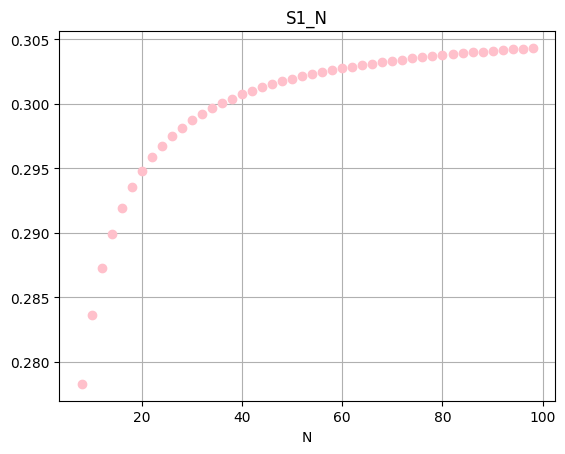

In [34]:
N=np.arange(8,100,2)
serie_1N=np.array([S1_N(n) for n in N])

plt.figure()
plt.plot(N, serie_1N, 'o', color = 'pink')
plt.title('S1_N')
plt.xlabel('N')
plt.grid()

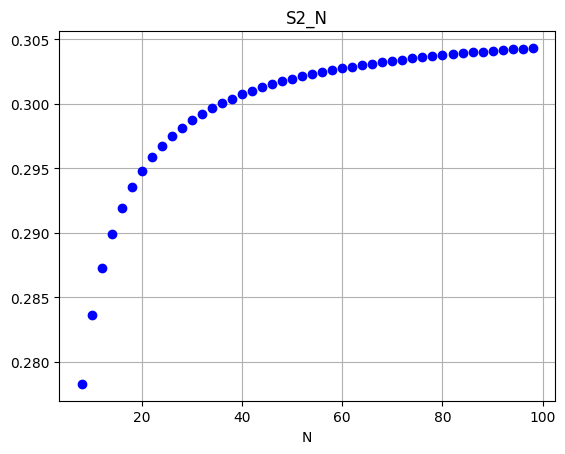

In [37]:
N=np.arange(8,100,2)
serie_1N=np.array([S2_N(n) for n in N])

plt.figure()
plt.plot(N, serie_1N, 'o', color = 'blue')
plt.title('S2_N')
plt.xlabel('N')
plt.grid()

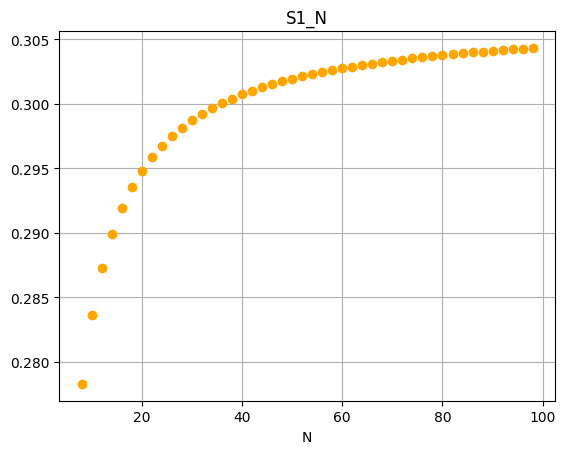

In [38]:
N=np.arange(8,100,2)
serie_1N=np.array([S3_N(n) for n in N])

plt.figure()
plt.plot(N, serie_1N, 'o', color = 'orange')
plt.title('S1_N')
plt.xlabel('N')
plt.grid()